## 下载解压图片

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/24stu/肝败下风/* ./

cp: cannot stat '/content/drive/MyDrive/24stu/肝败下风/*': No such file or directory


In [ ]:
!unrar x /content/新建文件夹.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/新建文件夹.rar

Creating    新建文件夹                                                     OK
Extracting  新建文件夹/1.jpeg                                                   0%  OK 
Extracting  新建文件夹/10.jpg                                                   0%  OK 
Extracting  新建文件夹/100.jpg                                                  0%  OK 
Extracting  新建文件夹/101.jpg                                                  1%  OK 
Extracting  新建文件夹/102.jpg                                                  1%  OK 
Extracting  新建文件夹/103.jpg                                                  1%  OK 
Extracting  新建文件夹/104.jpg                                                  1%  OK 
Extracting  新建文件夹/105.jpg                                                  1%  OK 
Extracting  新建文件夹/106.jpg                                                  

# 导入python包

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
import seaborn as sns

from tokenizers import Tokenizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
from torch import nn
from torch.nn import  functional as F

from torchvision.io import read_image
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import torchvision


from torchvision import datasets,models

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 超参数定义

In [ ]:

max_len = 40
n_class = 8
num_classes = 4
train_num = 160
test_num = 40

# 准备数据集

## 生成训练集和测试集

In [ ]:
def get_pic_name(item):
  pic_name = item.split('/')[-1]
  pic_path = '/content/新建文件夹/'+pic_name
  return pic_path

In [ ]:
import json
import re

def get_num_list(json_str):
  # json_str = "{'score': [0.1, 0.7, 0.2]}"
  ori_list = json_str.split('[')[1].split(']')[0].split(',')
  num_list = [float(item) for item in ori_list]
  return num_list



In [ ]:
pd_all = pd.read_csv('/content/新建文件夹/加了score值的表格.csv').sample(frac=1).reset_index(drop=True)
pd_all['pic_path'] = pd_all['pic'].map(get_pic_name)
pd_all['label'] = pd_all['label'] - 1
pd_all['vec'] = pd_all.score.map(get_num_list)
pd_train = pd_all[:160]
pd_test = pd_all[160:]
pd_all

,Unnamed: 0,pic,label,text,score,pic_path,vec
0,39,/content/39.jpg,0,一群抗议者在美国密歇根州议会大厦外手持枪支举行抗议活动。抗议者们反对该州的封锁措施，并要求...,"{'score': [0.1, 0.3, 0.6]}",/content/新建文件夹/39.jpg,"[0.1, 0.3, 0.6]"
1,98,/content/98.jpg,1,图片中，一个男人背对着我们，手里握着一把刀。他穿着一件黑色的T恤衫，刀子插在他的后背上，刀...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/98.jpg,"[0.1, 0.2, 0.7]"
2,74,/content/74.jpg,1,图片显示了三个青少年，其中两个男孩和一个女孩。男孩们穿着连帽衫，女孩穿着一件绿色的夹克衫。...,"{'score': [0.1,0.7,0.2]}",/content/新建文件夹/74.jpg,"[0.1, 0.7, 0.2]"
3,14,/content/14.jpg,0,金发碧眼的女孩身穿黑色夹克，手持双枪，表情严肃地看着前方。她的双手交叉握住枪柄，枪口朝下。...,"{'score': [0.1, 0.7, 0.2]}",/content/新建文件夹/14.jpg,"[0.1, 0.7, 0.2]"
4,185,/content/185.jpg,3,这是一辆芝加哥警局的警车，在执行任务时与一辆黑色轿车相撞，导致警车严重损坏。从图片中可以看...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/185.jpg,"[0.1, 0.2, 0.7]"
...,...,...,...,...,...,...,...
195,150,/content/150.jpg,2,一名男子从高楼坠落，趴在楼顶边缘，双腿悬空。他身穿白色长裤和白色上衣，看起来已经失去了知觉...,"{'score': [0.1, 0.7, 0.2]}",/content/新建文件夹/150.jpg,"[0.1, 0.7, 0.2]"
196,166,/content/166.jpg,3,这是一辆黑色的保时捷轿车，在发生事故后翻覆在地面上。车身严重变形，车顶凹陷，车门打开，安全...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/166.jpg,"[0.1, 0.2, 0.7]"
197,171,/content/171.jpg,3,这是一起惨烈的交通事故，一辆红色的大货车和一辆蓝色的小货车相撞，小货车被大货车压在车头下面...,"{'score': [0.05, 0.01, 0.94]}",/content/新建文件夹/171.jpg,"[0.05, 0.01, 0.94]"
198,84,/content/84.jpg,1,这是一张关于刀具的图片。图片中有一个手持刀具的人，刀具种类繁多，有折叠刀、直刀、斧头等。刀...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/84.jpg,"[0.1, 0.2, 0.7]"


In [ ]:
# pd_all = pd.read_csv('/content/数据集/data.csv',encoding='gbk').sample(frac=1).reset_index(drop=True)
# pd_all['pic_path'] = pd_all['pic'].map(get_pic_name)
# pd_all['vec'] = [[0.5,0.1,0.4]]*len(pd_all)
# pd_train = pd_all[:160]
# pd_test = pd_all[160:]
# pd_all

## 查看图文特征

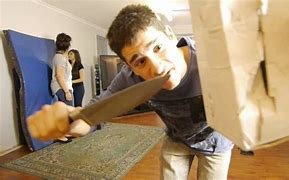

In [ ]:

eg_pic_path = '/content/新建文件夹/91.jpg'
# eg_pic_path = img_dir + '16_05_01_100.jpg'
# 打开图像并加载
img = Image.open(eg_pic_path)
# 显示图像
img

In [ ]:
def get_len(item):
  sen_len = len(item.split(' '))
  return sen_len

In [ ]:
pd_train['len'] = pd_train['text'].map(len)
pd_test['len'] = pd_test['text'].map(len)
pd_train

<ipython-input-12-32410a0d91ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_train['len'] = pd_train['text'].map(len)
<ipython-input-12-32410a0d91ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_test['len'] = pd_test['text'].map(len)


,Unnamed: 0,pic,label,text,score,pic_path,vec,len
0,39,/content/39.jpg,0,一群抗议者在美国密歇根州议会大厦外手持枪支举行抗议活动。抗议者们反对该州的封锁措施，并要求...,"{'score': [0.1, 0.3, 0.6]}",/content/新建文件夹/39.jpg,"[0.1, 0.3, 0.6]",53
1,98,/content/98.jpg,1,图片中，一个男人背对着我们，手里握着一把刀。他穿着一件黑色的T恤衫，刀子插在他的后背上，刀...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/98.jpg,"[0.1, 0.2, 0.7]",52
2,74,/content/74.jpg,1,图片显示了三个青少年，其中两个男孩和一个女孩。男孩们穿着连帽衫，女孩穿着一件绿色的夹克衫。...,"{'score': [0.1,0.7,0.2]}",/content/新建文件夹/74.jpg,"[0.1, 0.7, 0.2]",96
3,14,/content/14.jpg,0,金发碧眼的女孩身穿黑色夹克，手持双枪，表情严肃地看着前方。她的双手交叉握住枪柄，枪口朝下。...,"{'score': [0.1, 0.7, 0.2]}",/content/新建文件夹/14.jpg,"[0.1, 0.7, 0.2]",73
4,185,/content/185.jpg,3,这是一辆芝加哥警局的警车，在执行任务时与一辆黑色轿车相撞，导致警车严重损坏。从图片中可以看...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/185.jpg,"[0.1, 0.2, 0.7]",102
...,...,...,...,...,...,...,...,...
155,4,/content/4.jpg,0,这是一张以色列士兵的作战图片。画面中，两名士兵在一堵墙后面隐蔽着，其中一名士兵探出头，用枪...,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/4.jpg,"[0.1, 0.2, 0.7]",109
156,57,/content/57.jpg,1,图中两个人蒙面，手持武士刀。他们穿着黑色的衣服，戴着黑色的面罩，只露出眼睛和嘴巴。他们站在...,"{'score': [0.1, 0.7, 0.2]}",/content/新建文件夹/57.jpg,"[0.1, 0.7, 0.2]",59
157,114,/content/114.jpg,2,一个身穿绿色上衣和黑色裤子的女子坐在一栋楼的顶楼边缘，她的双脚悬空，身体向后仰，似乎随时都...,"{'score': [0.1, 0.1, 0.8]}",/content/新建文件夹/114.jpg,"[0.1, 0.1, 0.8]",53
158,54,/content/54.jpg,1,图片中，一只手握着一把刀，刀尖朝向前方。拿刀的手的虎口对着镜头，刀柄在手掌握着的部分有反光。,"{'score': [0.1, 0.2, 0.7]}",/content/新建文件夹/54.jpg,"[0.1, 0.2, 0.7]",47


<Axes: >

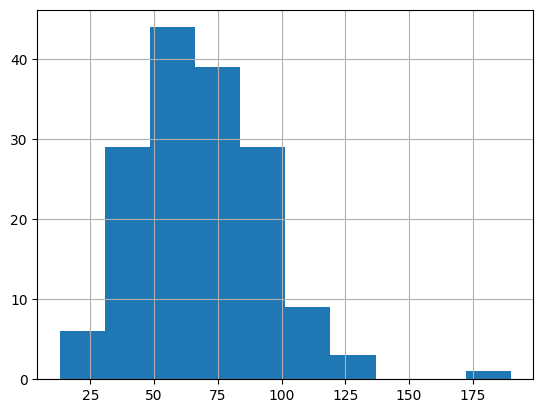

In [ ]:

pd_train['len'].hist()

In [ ]:
pd_train['label'].value_counts()

,count
label,
0,44
1,40
2,40
3,36


In [ ]:
pd_test['label'].value_counts()

,count
label,
3,14
2,10
1,10
0,6


# 确定GPU cpu使用情况

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# 数据处理pipline

### 准备dataset

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, pd_data):
        self.pd_data = pd_data
        self.text_list = list(pd_data['text'])
        self.label_list = list(pd_data['label'])
        self.img_path_list = list(pd_data['pic_path'])
        self.vec_lists = list(pd_data['vec'])


    def __len__(self):
        return len(self.pd_data)

    def __getitem__(self, idx):

        # 图像数据处理
        one_path = self.img_path_list[idx]
        # one_path = img_dir + one_path
        img_tensor = read_image(one_path,mode=torchvision.io.ImageReadMode.RGB)
        img_tensor = transforms.Resize((224,224))(img_tensor).float()


        # label数据处理
        one_label = self.label_list[idx]
        one_label = torch.tensor(one_label).long()
        return img_tensor,  one_label


tran_ds = CustomDataset(pd_train[:train_num])
test_ds = CustomDataset(pd_test[:test_num])

tran_ds[1][0].shape,tran_ds[1][1].shape,len(tran_ds),len(test_ds)

(torch.Size([3, 224, 224]), torch.Size([]), 160, 40)

## 生成dataloader

In [ ]:
train_dataloader = DataLoader(tran_ds, batch_size=8, shuffle=True,num_workers=2)
test_dataloader = DataLoader(test_ds, batch_size=8, shuffle=False,num_workers=2)

In [ ]:
# Display image and label.
b_img_rgb, train_labels = next(iter(train_dataloader))
print(f"b_img_rgb batch shape: {b_img_rgb.size()}")
print(f"train_labels batch shape: {train_labels.size()}")


b_img_rgb batch shape: torch.Size([8, 3, 224, 224])
train_labels batch shape: torch.Size([8])


In [ ]:
train_labels

tensor([2, 1, 0, 0, 3, 1, 1, 3])

In [ ]:
# Adam(params, lr=0.001

# 训练和评估循环

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (img_rgb, y) in enumerate(dataloader):
        # X, y = X.to(device), y.to(device)
        img_rgb = img_rgb.to(device)

        y = y.to(device)

        # Compute prediction error
        pred = model(img_rgb)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 50 == 0:
            loss, current = loss.item(), batch * len(img_rgb)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for (img_rgb, y) in dataloader:
            img_rgb = img_rgb.to(device)

            y = y.to(device)

            pred = model(img_rgb)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

# 模型 CNN

## 构建基础模型

In [ ]:
class BaseModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 32, 3)
        self.fc1 = nn.Linear(4608, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn_model = BaseModel().to(device)

cnn_model(b_img_rgb.to(device)).shape

torch.Size([8, 4])

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 3
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, cnn_model, loss_fn, optimizer)

    train_loss, train_correct = test(train_dataloader, cnn_model, loss_fn)
    test_loss, test_correct = test(test_dataloader, cnn_model, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.564143  [    0/  160]
Test Error: 
 Accuracy: 24.4%, Avg loss: 1.384088 

Test Error: 
 Accuracy: 32.5%, Avg loss: 1.383560 

Epoch 2
-------------------------------
loss: 1.382087  [    0/  160]
Test Error: 
 Accuracy: 43.1%, Avg loss: 1.269352 

Test Error: 
 Accuracy: 30.0%, Avg loss: 1.311900 

Epoch 3
-------------------------------
loss: 1.330970  [    0/  160]
Test Error: 
 Accuracy: 46.9%, Avg loss: 1.194521 

Test Error: 
 Accuracy: 35.0%, Avg loss: 1.303906 

Done!


## 可视化训练过程

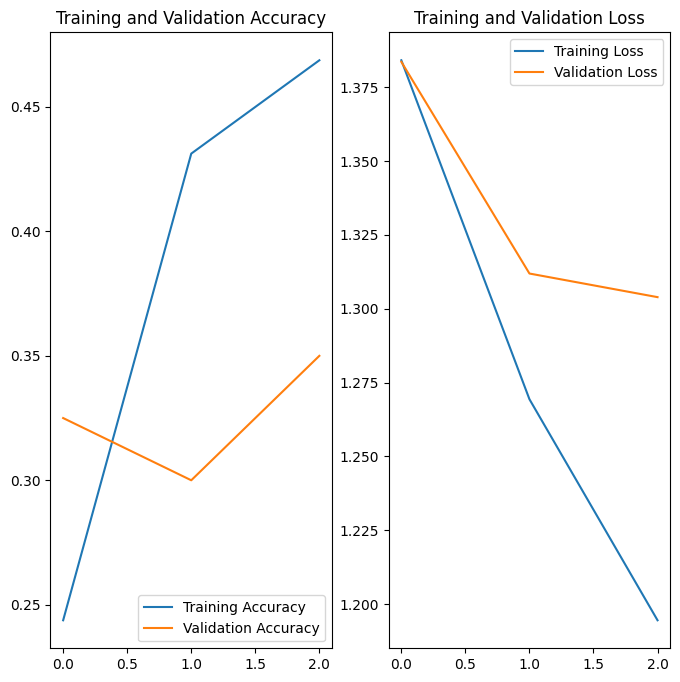

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dataloader:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = cnn_model(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.14404933, 0.22396123, 0.17210047, 0.13890734, 0.1526997 ],
       dtype=float32),
 array([3, 3, 3, 3, 3]),
 array([3, 2, 3, 1, 3]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.167     0.167     0.167         6
           1      0.333     0.100     0.154        10
           2      0.000     0.000     0.000        10
           3      0.387     0.857     0.533        14

    accuracy                          0.350        40
   macro avg      0.222     0.281     0.213        40
weighted avg      0.244     0.350     0.250        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 1,  0,  0,  5],
       [ 2,  1,  0,  7],
       [ 1,  2,  0,  7],
       [ 2,  0,  0, 12]])

<Axes: >

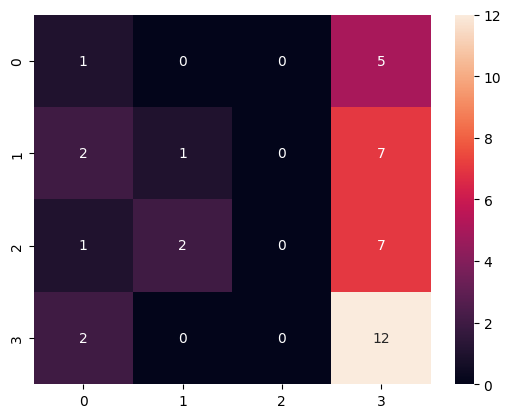

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

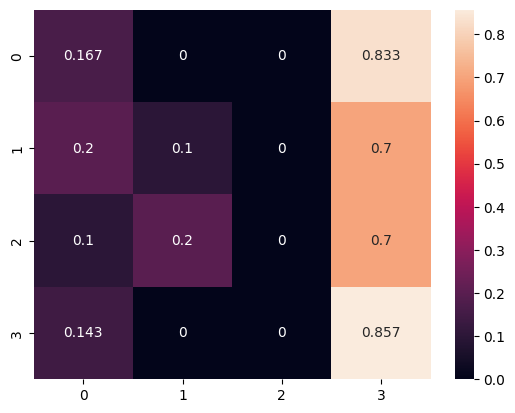

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')

# 模型 resnet18

## 构建基础模型

In [ ]:

base_model_resnet18 = models.resnet18(pretrained=True)
num_ftrs = base_model_resnet18.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
base_model_resnet18.fc = nn.Linear(num_ftrs, num_classes)

base_model_resnet18 = base_model_resnet18.to(device)

base_model_resnet18(b_img_rgb.to(device)).shape

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 213MB/s]


torch.Size([8, 4])

In [ ]:
base_model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(base_model_resnet18.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, base_model_resnet18, loss_fn, optimizer)

    train_loss, train_correct = test(train_dataloader, base_model_resnet18, loss_fn)
    test_loss, test_correct = test(test_dataloader, base_model_resnet18, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.940134  [    0/  160]
Test Error: 
 Accuracy: 44.4%, Avg loss: 1.232117 

Test Error: 
 Accuracy: 37.5%, Avg loss: 1.278787 

Epoch 2
-------------------------------
loss: 1.173187  [    0/  160]
Test Error: 
 Accuracy: 65.0%, Avg loss: 0.998773 

Test Error: 
 Accuracy: 45.0%, Avg loss: 1.100019 

Done!


## 可视化训练过程

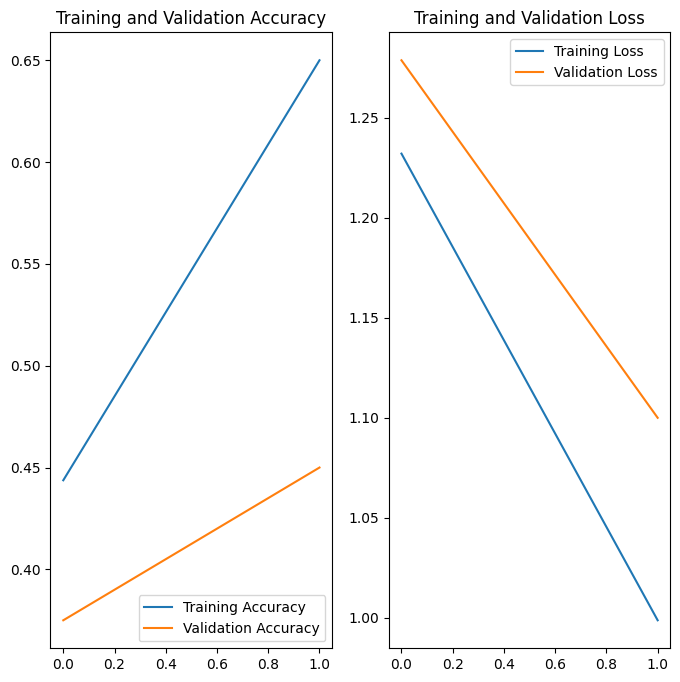

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dataloader:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = base_model_resnet18(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.18764335, 0.16357706, 0.14854906, 0.4114835 , 0.3438128 ],
       dtype=float32),
 array([0, 2, 3, 1, 1]),
 array([3, 2, 3, 1, 3]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.167     0.500     0.250         6
           1      0.556     0.500     0.526        10
           2      0.625     0.500     0.556        10
           3      1.000     0.357     0.526        14

    accuracy                          0.450        40
   macro avg      0.587     0.464     0.465        40
weighted avg      0.670     0.450     0.492        40



### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[3, 1, 2, 0],
       [5, 5, 0, 0],
       [4, 1, 5, 0],
       [6, 2, 1, 5]])

<Axes: >

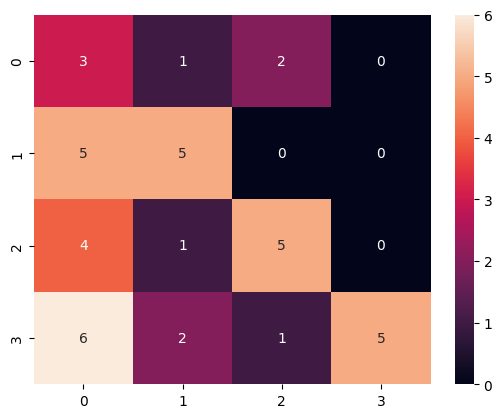

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

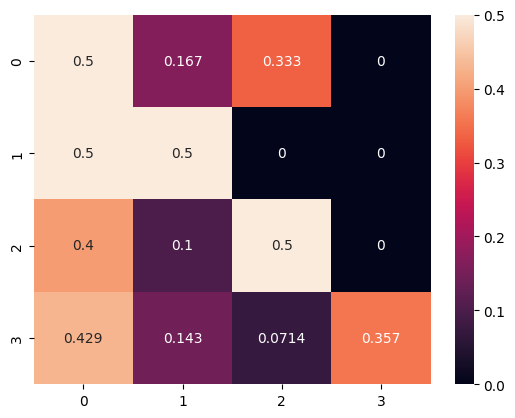

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3g')

# 模型 vgg13

## 构建基础模型

In [ ]:

base_model_vgg13 = models.vgg13(pretrained=True)

base_model_vgg13.classifier[-1] = nn.Linear(4096, num_classes)

base_model_vgg13.to(device)(b_img_rgb.to(device)).shape

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg13-19584684.pth" to /root/.cache/torch/hub/checkpoints/vgg13-19584684.pth
100%|██████████| 508M/508M [00:02<00:00, 190MB/s]


torch.Size([8, 4])

In [ ]:
base_model_vgg13

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(base_model_vgg13.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, base_model_vgg13, loss_fn, optimizer)

    train_loss, train_correct = test(train_dataloader, base_model_vgg13, loss_fn)
    test_loss, test_correct = test(test_dataloader, base_model_vgg13, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 13.272194  [    0/  160]
Test Error: 
 Accuracy: 27.5%, Avg loss:      nan 

Test Error: 
 Accuracy: 15.0%, Avg loss:      nan 

Epoch 2
-------------------------------
loss:     nan  [    0/  160]
Test Error: 
 Accuracy: 27.5%, Avg loss:      nan 

Test Error: 
 Accuracy: 15.0%, Avg loss:      nan 

Done!


## 可视化训练过程

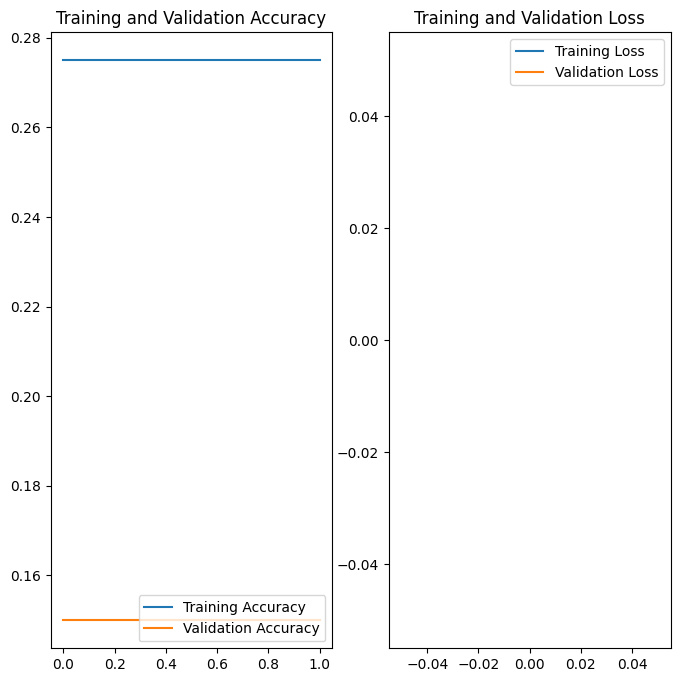

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dataloader:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = base_model_vgg13(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([nan, nan, nan, nan, nan], dtype=float32),
 array([0, 0, 0, 0, 0]),
 array([3, 2, 3, 1, 3]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.150     1.000     0.261         6
           1      0.000     0.000     0.000        10
           2      0.000     0.000     0.000        10
           3      0.000     0.000     0.000        14

    accuracy                          0.150        40
   macro avg      0.037     0.250     0.065        40
weighted avg      0.022     0.150     0.039        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 6,  0,  0,  0],
       [10,  0,  0,  0],
       [10,  0,  0,  0],
       [14,  0,  0,  0]])

<Axes: >

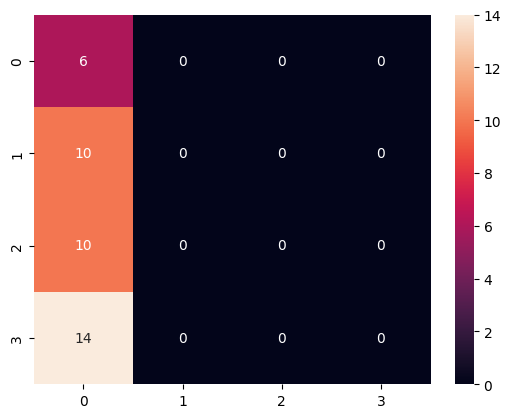

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

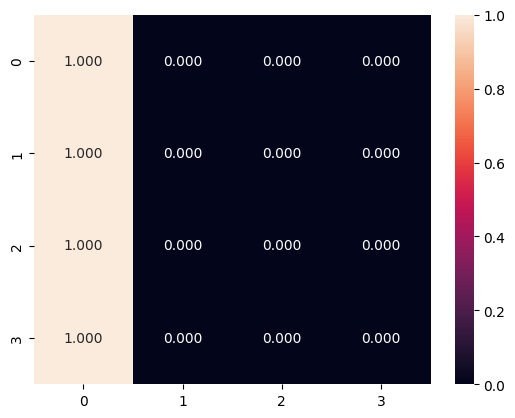

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')

# 模型 vit

## 构建基础模型

In [ ]:

base_model_vit_b_16 = models.vit_b_16(pretrained=True)
# base_model_vit_b_16.encoder.layers = base_model_vit_b_16.encoder.layers[:2]
base_model_vit_b_16.heads.head = nn.Linear(768, num_classes)

base_model_vit_b_16.to(device)(b_img_rgb.to(device)).shape

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 189MB/s]


torch.Size([8, 4])

In [ ]:
base_model_vit_b_16

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

## 分配损失函数和优化器

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(base_model_vit_b_16.parameters(), lr=1e-3)

## 训练和评估

In [ ]:
epochs = 2
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, base_model_vit_b_16, loss_fn, optimizer)

    train_loss, train_correct = test(train_dataloader, base_model_vit_b_16, loss_fn)
    test_loss, test_correct = test(test_dataloader, base_model_vit_b_16, loss_fn)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_correct)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_correct)
print("Done!")

Epoch 1
-------------------------------
loss: 1.428315  [    0/  160]
Test Error: 
 Accuracy: 23.1%, Avg loss: 1.392015 

Test Error: 
 Accuracy: 35.0%, Avg loss: 1.372097 

Epoch 2
-------------------------------
loss: 1.388943  [    0/  160]
Test Error: 
 Accuracy: 25.6%, Avg loss: 1.391715 

Test Error: 
 Accuracy: 27.5%, Avg loss: 1.357603 

Done!


## 可视化训练过程

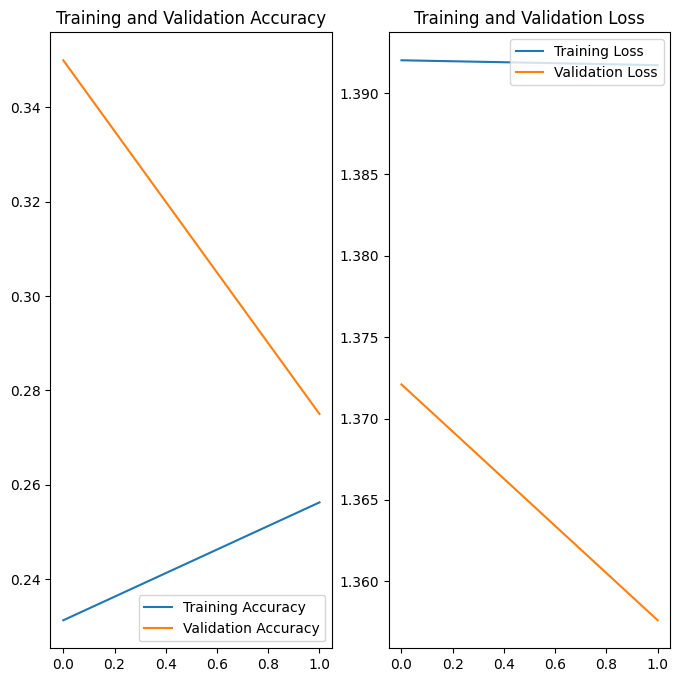

In [ ]:
# train_loss_array,train_acc_array,val_loss_array,val_acc_array
acc = train_acc_list
val_acc = test_acc_list

loss = train_loss_list
val_loss = test_loss_list
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 模型验证集预测

In [ ]:
predict_list = []
label_list = []
predict_pro_list = []
m_softmax = nn.Softmax(dim=1)
for (img_rgb, y) in test_dataloader:
    img_rgb = img_rgb.to(device)
    y = y.to(device)

    predict_score = base_model_vit_b_16(img_rgb)
    predict_pro = m_softmax(predict_score)

    predict_label = np.argmax(predict_score.detach().cpu().numpy(),axis=1)

    predict_pro_list.append(predict_pro.detach().cpu().numpy())
    predict_list.append(predict_label)
    label_list.append(y.detach().cpu().numpy())

predict_pro_array = np.vstack(predict_pro_list)[:,1]
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)
predict_pro_array[:5],predict_array[:5],label_array[:5]

(array([0.2325241 , 0.21139771, 0.2316667 , 0.24122247, 0.21720126],
       dtype=float32),
 array([2, 2, 2, 2, 2]),
 array([3, 2, 3, 1, 3]))

### 分类报告

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array,digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.000     0.000     0.000        10
           2      0.263     1.000     0.417        10
           3      0.500     0.071     0.125        14

    accuracy                          0.275        40
   macro avg      0.191     0.268     0.135        40
weighted avg      0.241     0.275     0.148        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 0,  0,  6,  0],
       [ 0,  0,  9,  1],
       [ 0,  0, 10,  0],
       [ 0,  0, 13,  1]])

<Axes: >

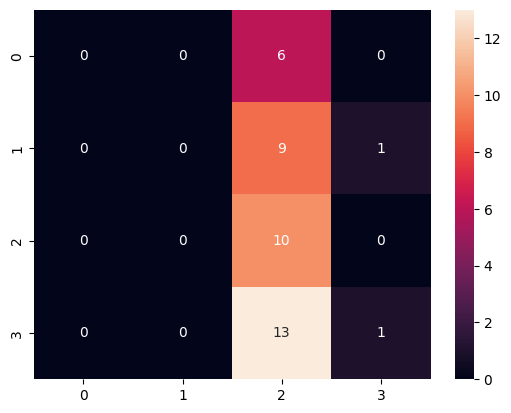

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g')

<Axes: >

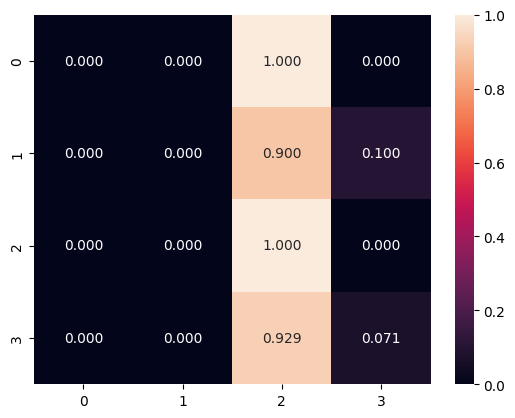

In [ ]:
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f')